*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/fall22/notebooks/module04_02_regularization.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Regularization:  the cure for overfitting

In our previous notebook on basis function regression we encountered the issue of overfitting, which occurred when we used monomials of a degree that is too high:



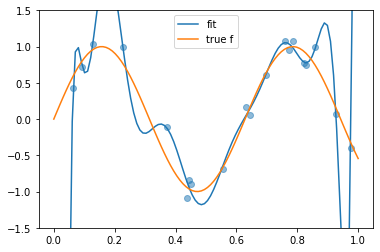

In [40]:
lr_model = make_pipeline(PolynomialFeatures(13),
                         LinearRegression())

rng = np.random.default_rng(42)
N = 20
x = rng.random(N)
y = np.sin(x * 10) + 0.2 * rng.standard_normal(N)

xfit = np.linspace(0, 1, 100)
lr_model.fit(x[:, np.newaxis], y)
yfit = lr_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, alpha=0.5)
plt.ylim(-1.5,1.5)
plt.plot(xfit, yfit, label='fit');
plt.plot(xfit, np.sin(xfit * 10), label='true f');
plt.legend();

### Ridge regression ($L_2$ regularization)

Regularization is the way to address overfitting in machine learning.
The idea is to add some information that would prevent the model from overfitting.
There are many ways to implement this idea.
In the context of linear regression we do so by adding another term to our mean-square-error.  Our orginal loss function

$$
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N(y_i - \mathbf{w}^\top \mathbf{x}_i)^2 
$$

is replaced by a regularized version that adds another term to the loss function:

$$
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2 + \alpha \,||\mathbf{w}||^2.
$$

Here, $\alpha>0$ is a parameter that controls the trade-off between fitting and regularization.
The regularizer $\mathbf{w}^\top \mathbf{w}$ is known as the $L_2$ regularizer.  Linear regression with the $L_2$ regularizer is known as *ridge regression*.

This regularizer encourages the parameters $\mathbf{w}$ to be small: the regularization term $\Omega(\mathbf{w}) = \alpha\, ||\mathbf{w}||^2$ is minimized when $\mathbf{w} = \mathbf{0}$. This counteracts what the loss term tries to do which is to have the model fit the data as closely as possible.  As we see next, the effect of the regularization term is to encourage a smoother solution.
Let's illustrate that using scikit-learn:


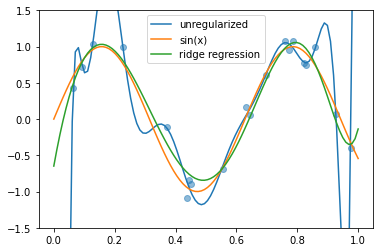

In [47]:
from sklearn.linear_model import Ridge

ridge_model = make_pipeline(PolynomialFeatures(13), Ridge(alpha=0.00001))

ridge_model.fit(x[:, np.newaxis], y)
yreg = ridge_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, alpha=0.5)
plt.ylim(-1.5,1.5)
plt.plot(xfit, yfit, label = 'unregularized');
plt.plot(xfit, np.sin(xfit*10), label = 'sin(x)');
plt.plot(xfit, yreg, label = 'ridge regression');
plt.legend();

Let's compare the weight vectors of the two models:

In [48]:
ridge_model.get_params()['ridge'].coef_

array([  0.        ,  23.43173725, -92.36367873,  60.94633507,
        69.13272293,   8.92974141, -37.17324724, -46.87013082,
       -29.71015467,  -3.05504352,  18.54825634,  26.11330846,
        15.68566147, -13.10369099])

In [49]:
lr_model.get_params()['linearregression'].coef_

array([ 0.00000000e+00,  8.53336638e+03, -1.89426148e+05,  2.33616340e+06,
       -1.79585907e+07,  9.16958180e+07, -3.23043998e+08,  8.02108840e+08,
       -1.41441479e+09,  1.76078088e+09, -1.51234326e+09,  8.52589149e+08,
       -2.83862442e+08,  4.22933105e+07])

### Question

* What can you say about the two weight vectors?  Is this what you would expect?  Play with the value of the regularization parameter $\alpha$ in the code above.  How does that affect the weight vector?

### Exercise

* The addition of the regularization term $\Omega(\mathbf{w}) = \alpha\, ||\mathbf{w}||^2$ adds another term to the gradient of the linear regression cost function.  What is the gradient with the addition of this term?

### Hyperparameters vs parameters

The regularization parameter $\alpha$ is different than the parameters $\mathbf{w}$ of our model.  The parameters $\mathbf{w}$ are set as part of the training procedure.  This is not the case for the regularization parameter.  It is called a **hyperparameter**.  Hyperparameters play an important role in machine learning and how best to search for good choices is itself a major focus of attention.  In our next notebook we will see a general method for choosing hyperparameters.

#### Reflection

* What other methods we already looked at has a hyperparameter?

###  Visualizing the effect of the regularization parameter

Next we will demonstrate the effect of $L_2$ regularization by visualizing the weight vector as a function of the value of the regularization hyperparameter.  Here, we will use ridge regression to solve a classification problem, namely the [breast cancer classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) dataset that is a part of scikit-learn:


In [50]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
X.shape
classifier = Ridge()

coefs = []
errors = []
alphas = np.logspace(-5, 2, 40)

# Train the model with different values of the regularization parameter:
for a in alphas:
    classifier.set_params(alpha=a)
    classifier.fit(X, y);
    coefs.append(classifier.coef_)

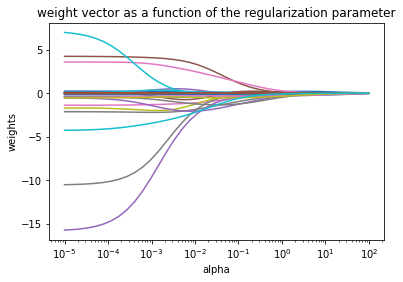

In [51]:
plt.semilogx(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('weight vector as a function of the regularization parameter')
plt.axis('tight');

**Observations:**

As $\alpha$ increases (strong regularization), the coefficients of the trained weight vector decrease, eventually converging to 0, as we would expect.

Now, we would like to know whether this actually helps in classification accuracy!  So let's explore accuracy as a function of the regularization parameter $\alpha$.

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5)

classifier = Ridge()

errors = []
alphas = np.logspace(-5, 2, 40)
accuracy = []

# Train the model with different values of the regularization parameter:
for a in alphas:
    classifier.set_params(alpha=a)
    classifier.fit(X_train, y_train);
    y_pred = classifier.predict(X_test)
    y_pred[y_pred>0.5]=1
    y_pred[y_pred<=0.5]=0
    accuracy.append(np.mean(y_pred==y_test))

**Note:** We used the ridge regression model to solve a classification problem, which is why we rounded the predicted labels to 0 / 1 to obtain a classification.  The scikit-learn class [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html) does exactly that.

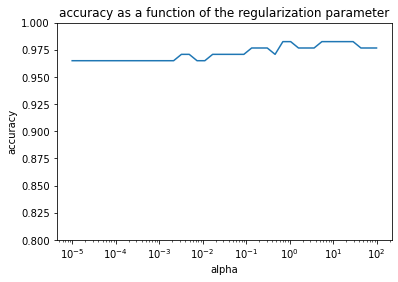

In [70]:
plt.semilogx(alphas, accuracy)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('accuracy as a function of the regularization parameter');
plt.ylim([0.8,1]);

For the linear model we saw a slight improvement in performance, which is likely not statistically meaningful.  To see the value of regularization we will need to create a non-linear classifier:

In [72]:
classifier = make_pipeline(PolynomialFeatures(2), 
                           StandardScaler(), 
                           Ridge())
errors = []
alphas = np.logspace(-5, 2, 40)
accuracy = []

# Train the model with different values of the regularization parameter:
for a in alphas:
    classifier.set_params(ridge__alpha=a)
    classifier.fit(X_train, y_train);
    y_pred = classifier.predict(X_test)
    y_pred[y_pred>0.5]=1
    y_pred[y_pred<=0.5]=0
    accuracy.append(np.mean(y_pred==y_test))
    

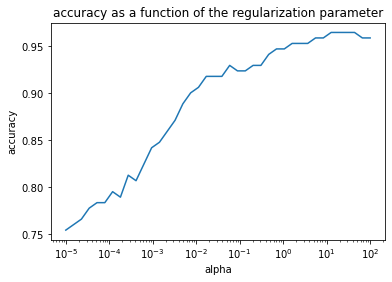

In [73]:
plt.semilogx(alphas, accuracy)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('accuracy as a function of the regularization parameter');

In this case there is a marked increase in performance with a regularized model.  Although, it seems that this particular problem does not require a non-linear classifier!

### The Lasso ($L_1$ regularization)

A common alternative to the $L_2$ penalty is to use the $L_1$ regularizer, also known as the Lasso:

$$
\Omega(\mathbf{w}) = \alpha \, ||\mathbf{w}||_1 = \alpha \sum_{i=1}^d |w_i|.
$$

The Lasso is available in scikit-learn as [sklearn.linear_model.Lasso](https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.Lasso.html).

Here is the Lasso regularization applied to the toy sine 
plus noise data used above:

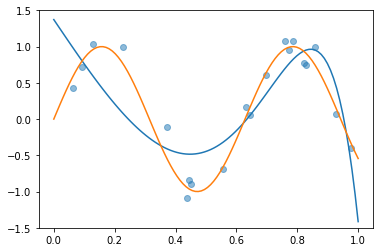

In [96]:
from sklearn.linear_model import Lasso
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning, 
                        module="sklearn")

rng = np.random.default_rng(42)
N = 20
x = rng.random(N)
y = np.sin(x * 10) + 0.2 * rng.standard_normal(N)

xfit = np.linspace(0, 1, 100)
lr_model.fit(x[:, np.newaxis], y)
yfit = lr_model.predict(xfit[:, np.newaxis])



model = make_pipeline(PolynomialFeatures(15), Lasso(alpha=1e-3))

#with ignore_warnings(category=ConvergenceWarning):
model.fit(x[:, np.newaxis], y)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, alpha=0.5)
plt.ylim(-1.5,1.5)
plt.plot(xfit, yfit);
plt.plot(xfit, np.sin(xfit*10));

The Lasso model behaves very differently than the ridge regression model in that it is very **sparse**:  most of the parameters are essentially zero as we can see next:

In [97]:
model.get_params()['lasso'].coef_

array([ 0.        , -6.21673677, -0.        ,  9.91219831,  1.07191202,
        0.        , -0.        , -0.        , -1.66759091, -4.59797724,
       -1.28943144, -0.        , -0.        , -0.        , -0.        ,
        0.        ])

We can also observe that behavior as a function of the regularization parameter:

In [100]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
X.shape
classifier = Lasso()

coefs = []
errors = []
alphas = np.logspace(-10, 1, 40)

# Train the model with different values of the regularization parameter:
for a in alphas:
    classifier.set_params(alpha=a)
    classifier.fit(X, y);
    #coefs.append(classifier.coef_[3:9])
    coefs.append(classifier.coef_)

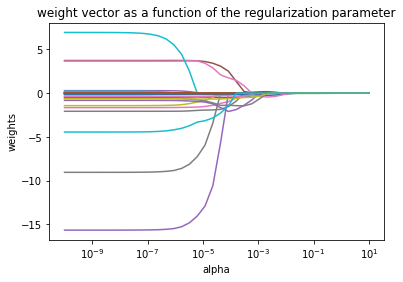

In [101]:
plt.semilogx(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('weight vector as a function of the regularization parameter')
plt.axis('tight');

### Exercise

* In order to implment the Lasso method we need to compute its gradient.  Compute the gradient of the lasso penalty $
\Omega(\mathbf{w}) = \alpha \, ||\mathbf{w}||_1 = \alpha \sum_{i=1}^d |w_i|.
$

### Summary

- Instead of minimizing the loss function (e.g. mean squared error), we minimize the loss plus an additional regularization term that penalizes overfitting.
- Regularization is a "cure" for overfitting.
- A tuning parameter $\alpha$ controls the magnitude of the penalty.
- A small value of $\alpha$ has a small effect on the parameters and the resulting model is similar to a normal linear model.
- Increasing alpha penalizes the coefficients and shrinks them towards zero.
- We have seen two version of the regularizer:  $L_1$, and $L_2$.  The $L_1$ regularizer leads to sparse solutions (few nonzero coefficients).  This can be both an advantage and disadvantage.
- We have a new problem - how do we choose the regularization hyperparameter.